## Logistic Regression

This is expected to develop logistic regression models to predict students having a romantic relationship based on their final grades, absences, failures, the combination of weekend and workday alcohol consumption and other guardians with the same training(70%) and testing(30%) data size. And then respecticely visualize each of the prediction and conduct analysis.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

def f(x):
   return x*x

def mean(x):
    return sum(x)/len(x)

def RMSE(obs,sim):
    m=np.array(obs)-np.array(sim)
    n=list(map(f,m))
    mse=sum(n)/len(obs)
    rmse=mse**0.5/mean(obs)
    return rmse

def MAE(obs,sim):
    m=np.array(obs)-np.array(sim)
    n=[abs(data) for data in m]
    mae1=sum(n)/len(obs)
    mae=mae1/mean(obs)
    return mae

In [2]:
test_df_data = pd.read_csv("testing_data.csv", sep=',', index_col=None)
train_df_data = pd.read_csv("training_data.csv", sep=',', index_col=None)


In [3]:
df_used = pd.get_dummies(test_df_data)
df_used.columns

df_used = pd.get_dummies(train_df_data)
df_used.columns

Index(['Unnamed: 0', 'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R',
       'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes',
       'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no',
       'activities_yes', 'nursery_no', 'nursery_yes', 'higher_no',
       'higher_yes', 'internet_no', 'internet_yes', 'romantic_no',
       'romantic_yes', 'age', 'Medu', 'Fedu', 'traveltime', 'studytime',
       'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G1', 'G2', 'G3', 'Finalc'],
      dtype='object')

## Use 'G3' to predict 'romantic_yes' and visualization

## Model

In [4]:
x_test=test_df_data[['G3']]
x_test=x_test.values.reshape(-1,1)
y_test=test_df_data[['romantic_yes']]
y_test=y_test.values.reshape(-1,1)


x_train=train_df_data[['G3']] 
x_train=x_train.values.reshape(-1,1)
y_train=train_df_data[['romantic_yes']]
y_train=y_train.values.reshape(-1,1)

In [5]:
modelLR=LogisticRegression()
modelLR.fit(x_train,y_train)
print('accuracy:')
print(modelLR.score(x_test,y_test))

accuracy:
0.5822784810126582


/Users/hesong/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [6]:
predictions = modelLR.predict(x_test)

print(predictions)

print(mean_squared_error(predictions, y_test))

print("Precision:{}".format(precision_score(y_test, predictions)))
print("Recall:{}".format(recall_score(y_test, predictions)))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]
0.4177215189873418
Precision:0.0
Recall:0.0


/Users/hesong/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [7]:
#First find the regression function y=a+bx, and then substitute it into the logistic function pred_y=1/(1+np.exp(-y))
b=modelLR.coef_
a=modelLR.intercept_
print('equation:1/(1+exp-(%f+%f*x))'%(a,b))

equation:1/(1+exp-(-0.317462+-0.045135*x))


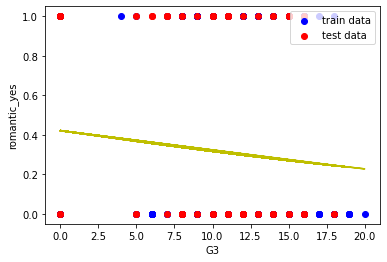

In [8]:
plt.scatter(x_train,y_train,color='b',label='train data')
plt.scatter(x_test,y_test,color='r',label='test data')
plt.plot(x_test,1/(1+np.exp(-(a+b*x_test))),color='r')
plt.plot(x_train,1/(1+np.exp(-(a+b*x_train))),color='y')
plt.legend(loc=1)
plt.xlabel('G3')
plt.ylabel('romantic_yes')
plt.show()

## Use 'Finalc' to predict 'romantic_yes' and visualization

In [9]:
x_test=test_df_data[['Finalc']]
x_test=x_test.values.reshape(-1,1)
y_test=test_df_data[['romantic_yes']]
y_test=y_test.values.reshape(-1,1)


x_train=train_df_data[['Finalc']] 
x_train=x_train.values.reshape(-1,1)
y_train=train_df_data[['romantic_yes']]
y_train=y_train.values.reshape(-1,1)

In [10]:
modelLR=LogisticRegression()
modelLR.fit(x_train,y_train)
print('accuracy:')
print(modelLR.score(x_test,y_test))

accuracy:
0.5822784810126582


/Users/hesong/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
predictions = modelLR.predict(x_test)

print(predictions)

print(mean_squared_error(predictions, y_test))

print("Precision:{}".format(precision_score(y_test, predictions)))
print("Recall:{}".format(recall_score(y_test, predictions)))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]
0.4177215189873418
Precision:0.0
Recall:0.0


/Users/hesong/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
#First find the regression function y=a+bx, and then substitute it into the logistic function pred_y=1/(1+np.exp(-y))
b=modelLR.coef_
a=modelLR.intercept_
print('equation:1/(1+exp-(%f+%f*x))'%(a,b))

equation:1/(1+exp-(-0.964800+0.046605*x))


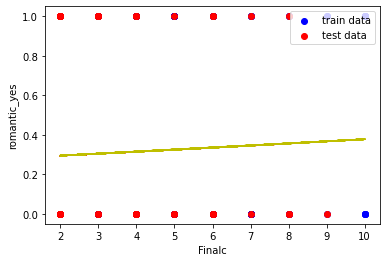

In [13]:
plt.scatter(x_train,y_train,color='b',label='train data')
plt.scatter(x_test,y_test,color='r',label='test data')
plt.plot(x_test,1/(1+np.exp(-(a+b*x_test))),color='r')
plt.plot(x_train,1/(1+np.exp(-(a+b*x_train))),color='y')
plt.legend(loc=1)
plt.xlabel('Finalc')
plt.ylabel('romantic_yes')
plt.show()

## Use 'absences' to predict 'romantic_yes' and visualization

In [14]:
x_test=test_df_data[['absences']]
x_test=x_test.values.reshape(-1,1)
y_test=test_df_data[['romantic_yes']]
y_test=y_test.values.reshape(-1,1)


x_train=train_df_data[['absences']] 
x_train=x_train.values.reshape(-1,1)
y_train=train_df_data[['romantic_yes']]
y_train=y_train.values.reshape(-1,1)

In [15]:
modelLR=LogisticRegression()
modelLR.fit(x_train,y_train)
print('accuracy:')
print(modelLR.score(x_test,y_test))

accuracy:
0.620253164556962


/Users/hesong/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
predictions = modelLR.predict(x_test)

print(predictions)

print(mean_squared_error(predictions, y_test))

print("Precision:{}".format(precision_score(y_test, predictions)))
print("Recall:{}".format(recall_score(y_test, predictions)))

[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]
0.379746835443038
Precision:1.0
Recall:0.09090909090909091


In [17]:
#First find the regression function y=a+bx, and then substitute it into the logistic function pred_y=1/(1+np.exp(-y))
b=modelLR.coef_
a=modelLR.intercept_
print('equation:1/(1+exp-(%f+%f*x))'%(a,b))

equation:1/(1+exp-(-1.026135+0.040801*x))


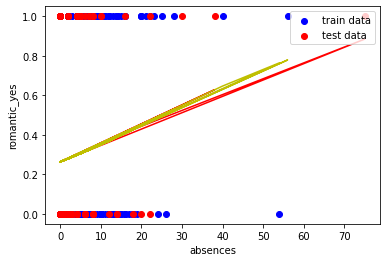

In [18]:
plt.scatter(x_train,y_train,color='b',label='train data')
plt.scatter(x_test,y_test,color='r',label='test data')
plt.plot(x_test,1/(1+np.exp(-(a+b*x_test))),color='r')
plt.plot(x_train,1/(1+np.exp(-(a+b*x_train))),color='y')
plt.legend(loc=1)
plt.xlabel('absences')
plt.ylabel('romantic_yes')
plt.show()

## Use 'failures' to predict 'romantic_yes' and visualization

In [19]:
x_test=test_df_data[['failures']]
x_test=x_test.values.reshape(-1,1)
y_test=test_df_data[['romantic_yes']]
y_test=y_test.values.reshape(-1,1)


x_train=train_df_data[['failures']] 
x_train=x_train.values.reshape(-1,1)
y_train=train_df_data[['romantic_yes']]
y_train=y_train.values.reshape(-1,1)

In [20]:
modelLR=LogisticRegression()
modelLR.fit(x_train,y_train)
print('accuracy:')
print(modelLR.score(x_test,y_test))

accuracy:
0.5822784810126582


/Users/hesong/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
predictions = modelLR.predict(x_test)

print(predictions)

print(mean_squared_error(predictions, y_test))

print("Precision:{}".format(precision_score(y_test, predictions)))
print("Recall:{}".format(recall_score(y_test, predictions)))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]
0.4177215189873418
Precision:0.0
Recall:0.0


/Users/hesong/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
#First find the regression function y=a+bx, and then substitute it into the logistic function pred_y=1/(1+np.exp(-y))
b=modelLR.coef_
a=modelLR.intercept_
print('equation:1/(1+exp-(%f+%f*x))'%(a,b))

equation:1/(1+exp-(-0.841481+0.165998*x))


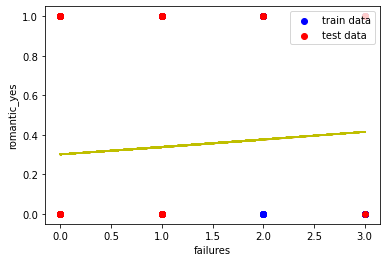

In [23]:
plt.scatter(x_train,y_train,color='b',label='train data')
plt.scatter(x_test,y_test,color='r',label='test data')
plt.plot(x_test,1/(1+np.exp(-(a+b*x_test))),color='r')
plt.plot(x_train,1/(1+np.exp(-(a+b*x_train))),color='y')
plt.legend(loc=1)
plt.xlabel('failures')
plt.ylabel('romantic_yes')
plt.show()

## Use 'guardian_other' to predict 'romantic_yes' and visualization

In [24]:
x_test=test_df_data[['guardian_other']]
x_test=x_test.values.reshape(-1,1)
y_test=test_df_data[['romantic_yes']]
y_test=y_test.values.reshape(-1,1)


x_train=train_df_data[['guardian_other']] 
x_train=x_train.values.reshape(-1,1)
y_train=train_df_data[['romantic_yes']]
y_train=y_train.values.reshape(-1,1)

In [25]:
modelLR=LogisticRegression()
modelLR.fit(x_train,y_train)
print('accuracy:')
print(modelLR.score(x_test,y_test))

accuracy:
0.569620253164557


/Users/hesong/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
predictions = modelLR.predict(x_test)

print(predictions)

print(mean_squared_error(predictions, y_test))

print("Precision:{}".format(precision_score(y_test, predictions)))
print("Recall:{}".format(recall_score(y_test, predictions)))

[0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]
0.43037974683544306
Precision:0.42857142857142855
Recall:0.09090909090909091


In [27]:
#First find the regression function y=a+bx, and then substitute it into the logistic function pred_y=1/(1+np.exp(-y))
b=modelLR.coef_
a=modelLR.intercept_
print('equation:1/(1+exp-(%f+%f*x))'%(a,b))

equation:1/(1+exp-(-0.869383+0.956412*x))


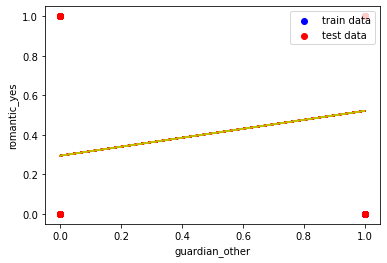

In [28]:
plt.scatter(x_train,y_train,color='b',label='train data')
plt.scatter(x_test,y_test,color='r',label='test data')
plt.plot(x_test,1/(1+np.exp(-(a+b*x_test))),color='r')
plt.plot(x_train,1/(1+np.exp(-(a+b*x_train))),color='y')
plt.legend(loc=1)
plt.xlabel('guardian_other')
plt.ylabel('romantic_yes')
plt.show()